# Normal Distribution

## What is Normal Distribution?

### 🎯 Think of it like this:
Imagine you're measuring the **height of 1000 adult men** in your city:
- Most men will be around **average height** (let's say 5'8")
- Some will be a bit **taller** (6'0") and some a bit **shorter** (5'6")
- Very few will be **extremely tall** (6'6") or **extremely short** (5'0")
- If you draw this on a graph, it looks like a **bell** 🔔

### 📊 This is the Normal Distribution!



## Let's See It in Action with Python

### Step 1: Create Our First Normal Distribution


In [102]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
# Let's create heights for 1000 men
# Average height: 68 inches (5'8")
# Most men are within 3 inches of average
np.random.seed(42)  # This makes our results the same every time
heights = np.random.normal(68, 3, 1000)

In [104]:
# Let's see what we got
print("Our Height Data:")
print(f"Average height: {heights.mean():.1f} inches")
print(f"Shortest person: {heights.min():.1f} inches")
print(f"Tallest person: {heights.max():.1f} inches")
print(f"Most heights vary by: {heights.std():.1f} inches from average")

Our Height Data:
Average height: 68.1 inches
Shortest person: 58.3 inches
Tallest person: 79.6 inches
Most heights vary by: 2.9 inches from average


In [105]:
### Step 2: Visualize the Bell Shape

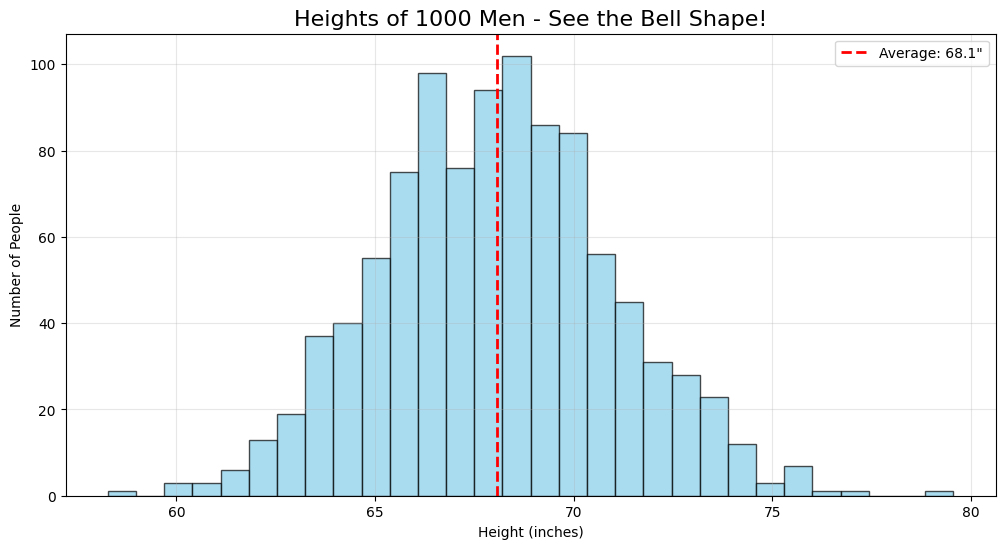

In [106]:
# Create a beautiful graph
plt.figure(figsize=(12, 6))
plt.hist(heights, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(heights.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Average: {heights.mean():.1f}"')
plt.title('Heights of 1000 Men - See the Bell Shape!', fontsize=16)
plt.xlabel('Height (inches)')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [107]:
# Count how many people are in different ranges
average = heights.mean()
print(f"\nHow many people are:")
print(f"Very short (under 62\"): {sum(heights < 62)}")
print(f"Short (62-65\"): {sum((heights >= 62) & (heights < 65))}")
print(f"Average (65-71\"): {sum((heights >= 65) & (heights < 71))}")
print(f"Tall (71-74\"): {sum((heights >= 71) & (heights < 74))}")
print(f"Very tall (over 74\"): {sum(heights > 74)}")


How many people are:
Very short (under 62"): 17
Short (62-65"): 130
Average (65-71"): 698
Tall (71-74"): 131
Very tall (over 74"): 24


## The Magic Rule: 68-95-99.7

### 🎯 This is the most important thing to remember!

In ANY normal distribution:
- **68%** of data is within **1 step** of average
- **95%** of data is within **2 steps** of average  
- **99.7%** of data is within **3 steps** of average

**"Step" = Standard Deviation** (how much things typically vary)

### Let's Prove This Magic Rule



In [108]:
# Our heights: average = 68 inches, step size = 3 inches
average = 68
step_size = 3

In [109]:
# Calculate the boundaries
one_step_range = [average - step_size, average + step_size]      # 65 to 71 inches
two_step_range = [average - 2*step_size, average + 2*step_size]  # 62 to 74 inches
three_step_range = [average - 3*step_size, average + 3*step_size] # 59 to 77 inches

In [110]:
print("🎯 The Magic Rule Predictions:")
print(f"68% of men should be between {one_step_range[0]}\" and {one_step_range[1]}\"")
print(f"95% of men should be between {two_step_range[0]}\" and {two_step_range[1]}\"")
print(f"99.7% of men should be between {three_step_range[0]}\" and {three_step_range[1]}\"")

🎯 The Magic Rule Predictions:
68% of men should be between 65" and 71"
95% of men should be between 62" and 74"
99.7% of men should be between 59" and 77"


In [111]:
# Now let's check our actual data
within_1_step = sum((heights >= one_step_range[0]) & (heights <= one_step_range[1]))
within_2_steps = sum((heights >= two_step_range[0]) & (heights <= two_step_range[1]))
within_3_steps = sum((heights >= three_step_range[0]) & (heights <= three_step_range[1]))

In [112]:
print(f"\n📊 What we actually found:")
print(f"Within 1 step (65-71\"): {within_1_step} people = {within_1_step/10:.1f}%")
print(f"Within 2 steps (62-74\"): {within_2_steps} people = {within_2_steps/10:.1f}%")
print(f"Within 3 steps (59-77\"): {within_3_steps} people = {within_3_steps/10:.1f}%")

print(f"\n🎉 Magic! The rule works!")


📊 What we actually found:
Within 1 step (65-71"): 698 people = 69.8%
Within 2 steps (62-74"): 959 people = 95.9%
Within 3 steps (59-77"): 997 people = 99.7%

🎉 Magic! The rule works!


In [113]:
### Visual Proof of the Magic Rule

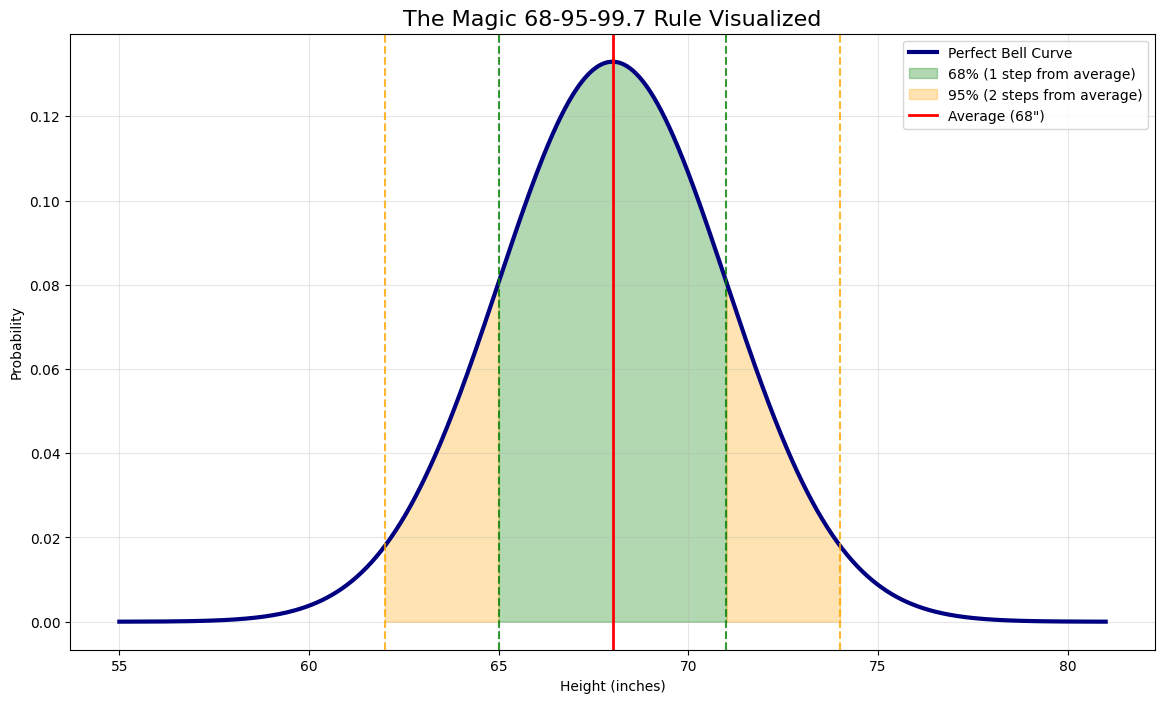

In [114]:
# Create a beautiful visualization
plt.figure(figsize=(14, 8))

# Create smooth curve
x = np.linspace(55, 81, 1000)
y = (1/(step_size * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - average) / step_size) ** 2)

plt.plot(x, y, 'navy', linewidth=3, label='Perfect Bell Curve')

# Color the areas
# 68% area (1 standard deviation)
x1 = np.linspace(65, 71, 100)
y1 = (1/(step_size * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - average) / step_size) ** 2)
plt.fill_between(x1, y1, alpha=0.3, color='green', label='68% (1 step from average)')

# 95% area (2 standard deviations)
x2a = np.linspace(62, 65, 100)
y2a = (1/(step_size * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x2a - average) / step_size) ** 2)
x2b = np.linspace(71, 74, 100)
y2b = (1/(step_size * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x2b - average) / step_size) ** 2)
plt.fill_between(x2a, y2a, alpha=0.3, color='orange', label='95% (2 steps from average)')
plt.fill_between(x2b, y2b, alpha=0.3, color='orange')

# Add lines for the boundaries
plt.axvline(65, color='green', linestyle='--', alpha=0.8)
plt.axvline(71, color='green', linestyle='--', alpha=0.8)
plt.axvline(62, color='orange', linestyle='--', alpha=0.8)
plt.axvline(74, color='orange', linestyle='--', alpha=0.8)
plt.axvline(68, color='red', linestyle='-', linewidth=2, label='Average (68")')

plt.title('The Magic 68-95-99.7 Rule Visualized', fontsize=16)
plt.xlabel('Height (inches)')
plt.ylabel('Probability')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

## Real-World Example: Pizza Delivery Times

### 🍕 Let's make this practical!

**Scenario**: A pizza place promises delivery in 30 minutes. Let's see how they're doing!



In [115]:
# Pizza delivery times (in minutes)
# Average: 28 minutes, varies by 5 minutes
np.random.seed(100)
delivery_times = np.random.normal(28, 5, 500)

In [116]:
print("🍕 Pizza Delivery Analysis:")
print(f"Average delivery time: {delivery_times.mean():.1f} minutes")
print(f"Typical variation: {delivery_times.std():.1f} minutes")
print(f"Fastest delivery: {delivery_times.min():.1f} minutes")
print(f"Slowest delivery: {delivery_times.max():.1f} minutes")

🍕 Pizza Delivery Analysis:
Average delivery time: 28.0 minutes
Typical variation: 5.2 minutes
Fastest delivery: 13.1 minutes
Slowest delivery: 45.3 minutes


In [117]:
# How many deliveries meet the 30-minute promise?
on_time = sum(delivery_times <= 30)
print(f"\nDeliveries within 30 minutes: {on_time} out of 500 ({on_time/5:.1f}%)")


Deliveries within 30 minutes: 329 out of 500 (65.8%)


In [118]:
# Using the magic rule to predict performance
average_time = 28
variation = 5

In [119]:
print(f"\n🎯 Using the Magic Rule:")
print(f"68% of deliveries between {average_time-variation:.0f}-{average_time+variation:.0f} minutes")
print(f"95% of deliveries between {average_time-2*variation:.0f}-{average_time+2*variation:.0f} minutes")
print(f"99.7% of deliveries between {average_time-3*variation:.0f}-{average_time+3*variation:.0f} minutes")


🎯 Using the Magic Rule:
68% of deliveries between 23-33 minutes
95% of deliveries between 18-38 minutes
99.7% of deliveries between 13-43 minutes


In [120]:
# What percentage should be delivered within 30 minutes?
from scipy import stats
percent_on_time = stats.norm.cdf(30, average_time, variation) * 100
print(f"\nPredicted on-time delivery rate: {percent_on_time:.1f}%")


Predicted on-time delivery rate: 65.5%


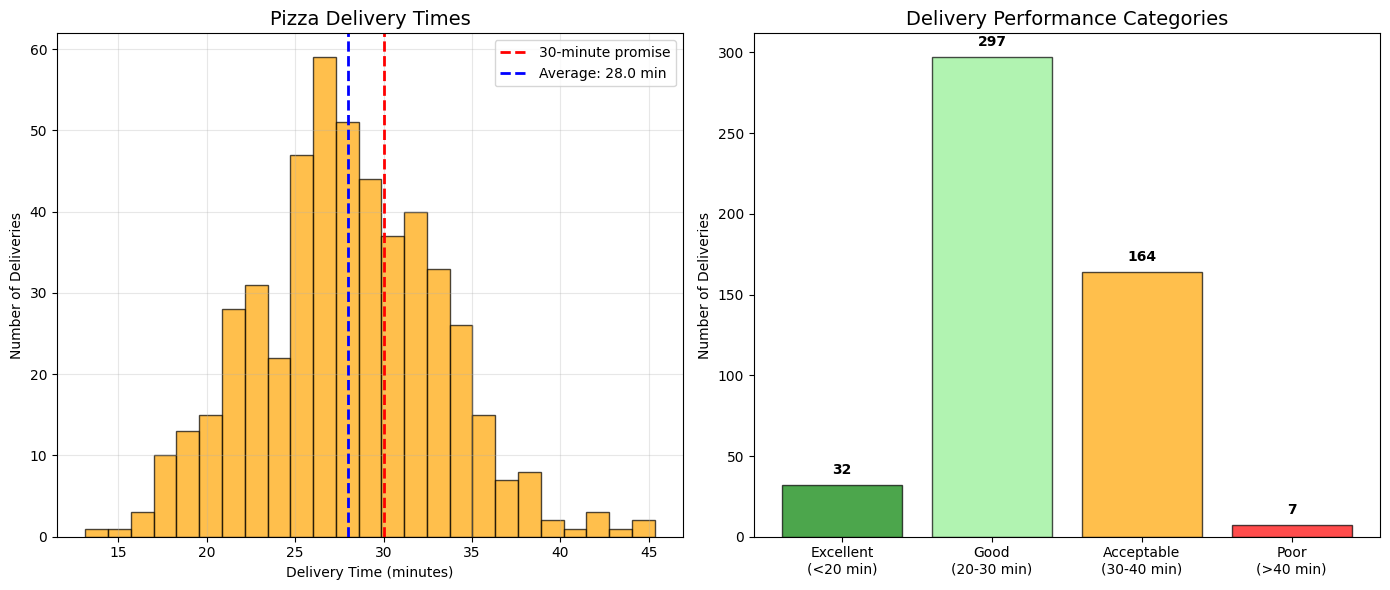

In [121]:
### Visualize Pizza Delivery Performance


plt.figure(figsize=(14, 6))

# Plot 1: Histogram of delivery times
plt.subplot(1, 2, 1)
plt.hist(delivery_times, bins=25, color='orange', alpha=0.7, edgecolor='black')
plt.axvline(30, color='red', linestyle='--', linewidth=2, label='30-minute promise')
plt.axvline(delivery_times.mean(), color='blue', linestyle='--', linewidth=2,
            label=f'Average: {delivery_times.mean():.1f} min')
plt.title('Pizza Delivery Times', fontsize=14)
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Number of Deliveries')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Performance zones
plt.subplot(1, 2, 2)
categories = ['Excellent\n(<20 min)', 'Good\n(20-30 min)', 'Acceptable\n(30-40 min)', 'Poor\n(>40 min)']
counts = [
    sum(delivery_times < 20),
    sum((delivery_times >= 20) & (delivery_times < 30)),
    sum((delivery_times >= 30) & (delivery_times < 40)),
    sum(delivery_times >= 40)
]
colors = ['green', 'lightgreen', 'orange', 'red']

bars = plt.bar(categories, counts, color=colors, alpha=0.7, edgecolor='black')
plt.title('Delivery Performance Categories', fontsize=14)
plt.ylabel('Number of Deliveries')

# Add count labels on bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Why Normal Distribution Matters

### 🌟 It's everywhere in real life!

**Examples where you see normal distribution:**
1. **Heights and weights** of people
2. **Test scores** in large classes  
3. **Manufacturing quality** (product weights, sizes)
4. **Measurement errors** in scientific experiments
5. **Stock market daily changes**
6. **Blood pressure** readings
7. **Temperature variations**
8. **Reaction times**

### Quick Practice: Understanding Your Data


In [122]:
# Let's create different scenarios and see the patterns


In [123]:
# Scenario 1: Student test scores
np.random.seed(42)
test_scores = np.random.normal(75, 10, 200)  # Average 75, std 10

# Scenario 2: Coffee cup filling (supposed to be 8 oz)
coffee_volumes = np.random.normal(8.0, 0.2, 300)  # Average 8.0 oz, std 0.2 oz

# Scenario 3: Daily temperature in spring
spring_temps = np.random.normal(65, 8, 100)  # Average 65°F, std 8°F

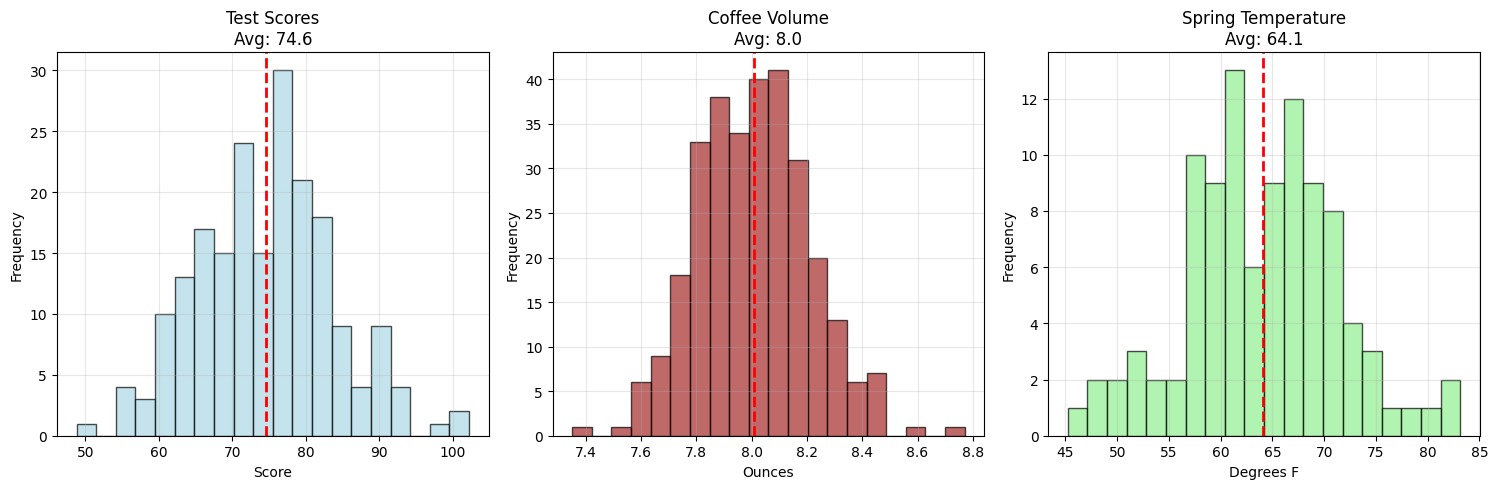

In [124]:
plt.figure(figsize=(15, 5))

# Plot all three scenarios
scenarios = [
    (test_scores, 'Test Scores', 'Score', 'lightblue'),
    (coffee_volumes, 'Coffee Volume', 'Ounces', 'brown'),
    (spring_temps, 'Spring Temperature', 'Degrees F', 'lightgreen')
]

for i, (data, title, xlabel, color) in enumerate(scenarios):
    plt.subplot(1, 3, i+1)
    plt.hist(data, bins=20, color=color, alpha=0.7, edgecolor='black')
    plt.axvline(data.mean(), color='red', linestyle='--', linewidth=2)
    plt.title(f'{title}\nAvg: {data.mean():.1f}', fontsize=12)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [125]:
# Summary statistics
print("📊 Summary of All Scenarios:")
for data, title, _, _ in scenarios:
    print(f"\n{title}:")
    print(f"  Average: {data.mean():.2f}")
    print(f"  Standard deviation: {data.std():.2f}")
    print(f"  Range: {data.min():.1f} to {data.max():.1f}")

📊 Summary of All Scenarios:

Test Scores:
  Average: 74.59
  Standard deviation: 9.29
  Range: 48.8 to 102.2

Coffee Volume:
  Average: 8.01
  Standard deviation: 0.20
  Range: 7.4 to 8.8

Spring Temperature:
  Average: 64.08
  Standard deviation: 7.35
  Range: 45.2 to 83.2
